# Problem Statement


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia.

The company is looking at prospective properties to buy to enter the market.

The company wants to know:

Which variables are significant in predicting the price of a house?

How well those variables describe the price of a house?

## Reading and Understanding the Data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [52]:
surprise = pd.read_csv("C:/Users/hp/Desktop/train.csv")

In [53]:
surprise.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
surprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [55]:
surprise.shape

(1460, 81)

In [56]:
sum(surprise.duplicated(subset = 'Id')) == 0

True

In [57]:
print (surprise.isnull().values.any())

True


In [58]:
surprise.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [59]:
round(100*(surprise.isnull().sum())/len(surprise.index))

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
                 ...  
BedroomAbvGr       0.0
KitchenAbvGr       0.0
KitchenQual        0.0
TotRmsAbvGrd       0.0
Functional         0.0
Fireplaces         0.0
FireplaceQu       47.0
GarageType         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageCars         0.0
GarageArea         0.0
GarageQual 

In [60]:
surprise.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Data Cleaning & Preparation

After going through the data dictionary, we understood that not all NaN values indicate null values. Most of the NaN value actually indicate absence of features for example. 

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
The NaN value here actually indicate there in no alley access to the property. Hence, we will impute these values.

Replacing all such NaN to NA = Not applicable ( for example NA = No alley access)

In [61]:
surprise.Alley = surprise.Alley.replace(np.nan, 'NA', regex=True)
surprise.BsmtQual = surprise.BsmtQual.replace(np.nan, 'NA', regex=True)
surprise.BsmtCond = surprise.BsmtCond.replace(np.nan, 'NA', regex=True)
surprise.BsmtExposure = surprise.BsmtExposure.replace(np.nan, 'NA', regex=True)
surprise.BsmtFinType1 = surprise.BsmtFinType1.replace(np.nan, 'NA', regex=True)
surprise.BsmtFinType2 = surprise.BsmtFinType2.replace(np.nan, 'NA', regex=True)
surprise.FireplaceQu = surprise.FireplaceQu.replace(np.nan, 'NA', regex=True)
surprise.GarageType = surprise.GarageType.replace(np.nan, 'NA', regex=True)
surprise.GarageFinish = surprise.GarageFinish.replace(np.nan, 'NA', regex=True)
surprise.GarageQual = surprise.GarageQual.replace(np.nan, 'NA', regex=True)
surprise.GarageCond = surprise.GarageCond.replace(np.nan, 'NA', regex=True)
surprise.Fence = surprise.Fence.replace(np.nan, 'NA', regex=True)
surprise.PoolQC = surprise.PoolQC.replace(np.nan, 'NA', regex=True)
surprise.MiscFeature = surprise.MiscFeature.replace(np.nan, 'NA', regex=True)

In [62]:
surprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

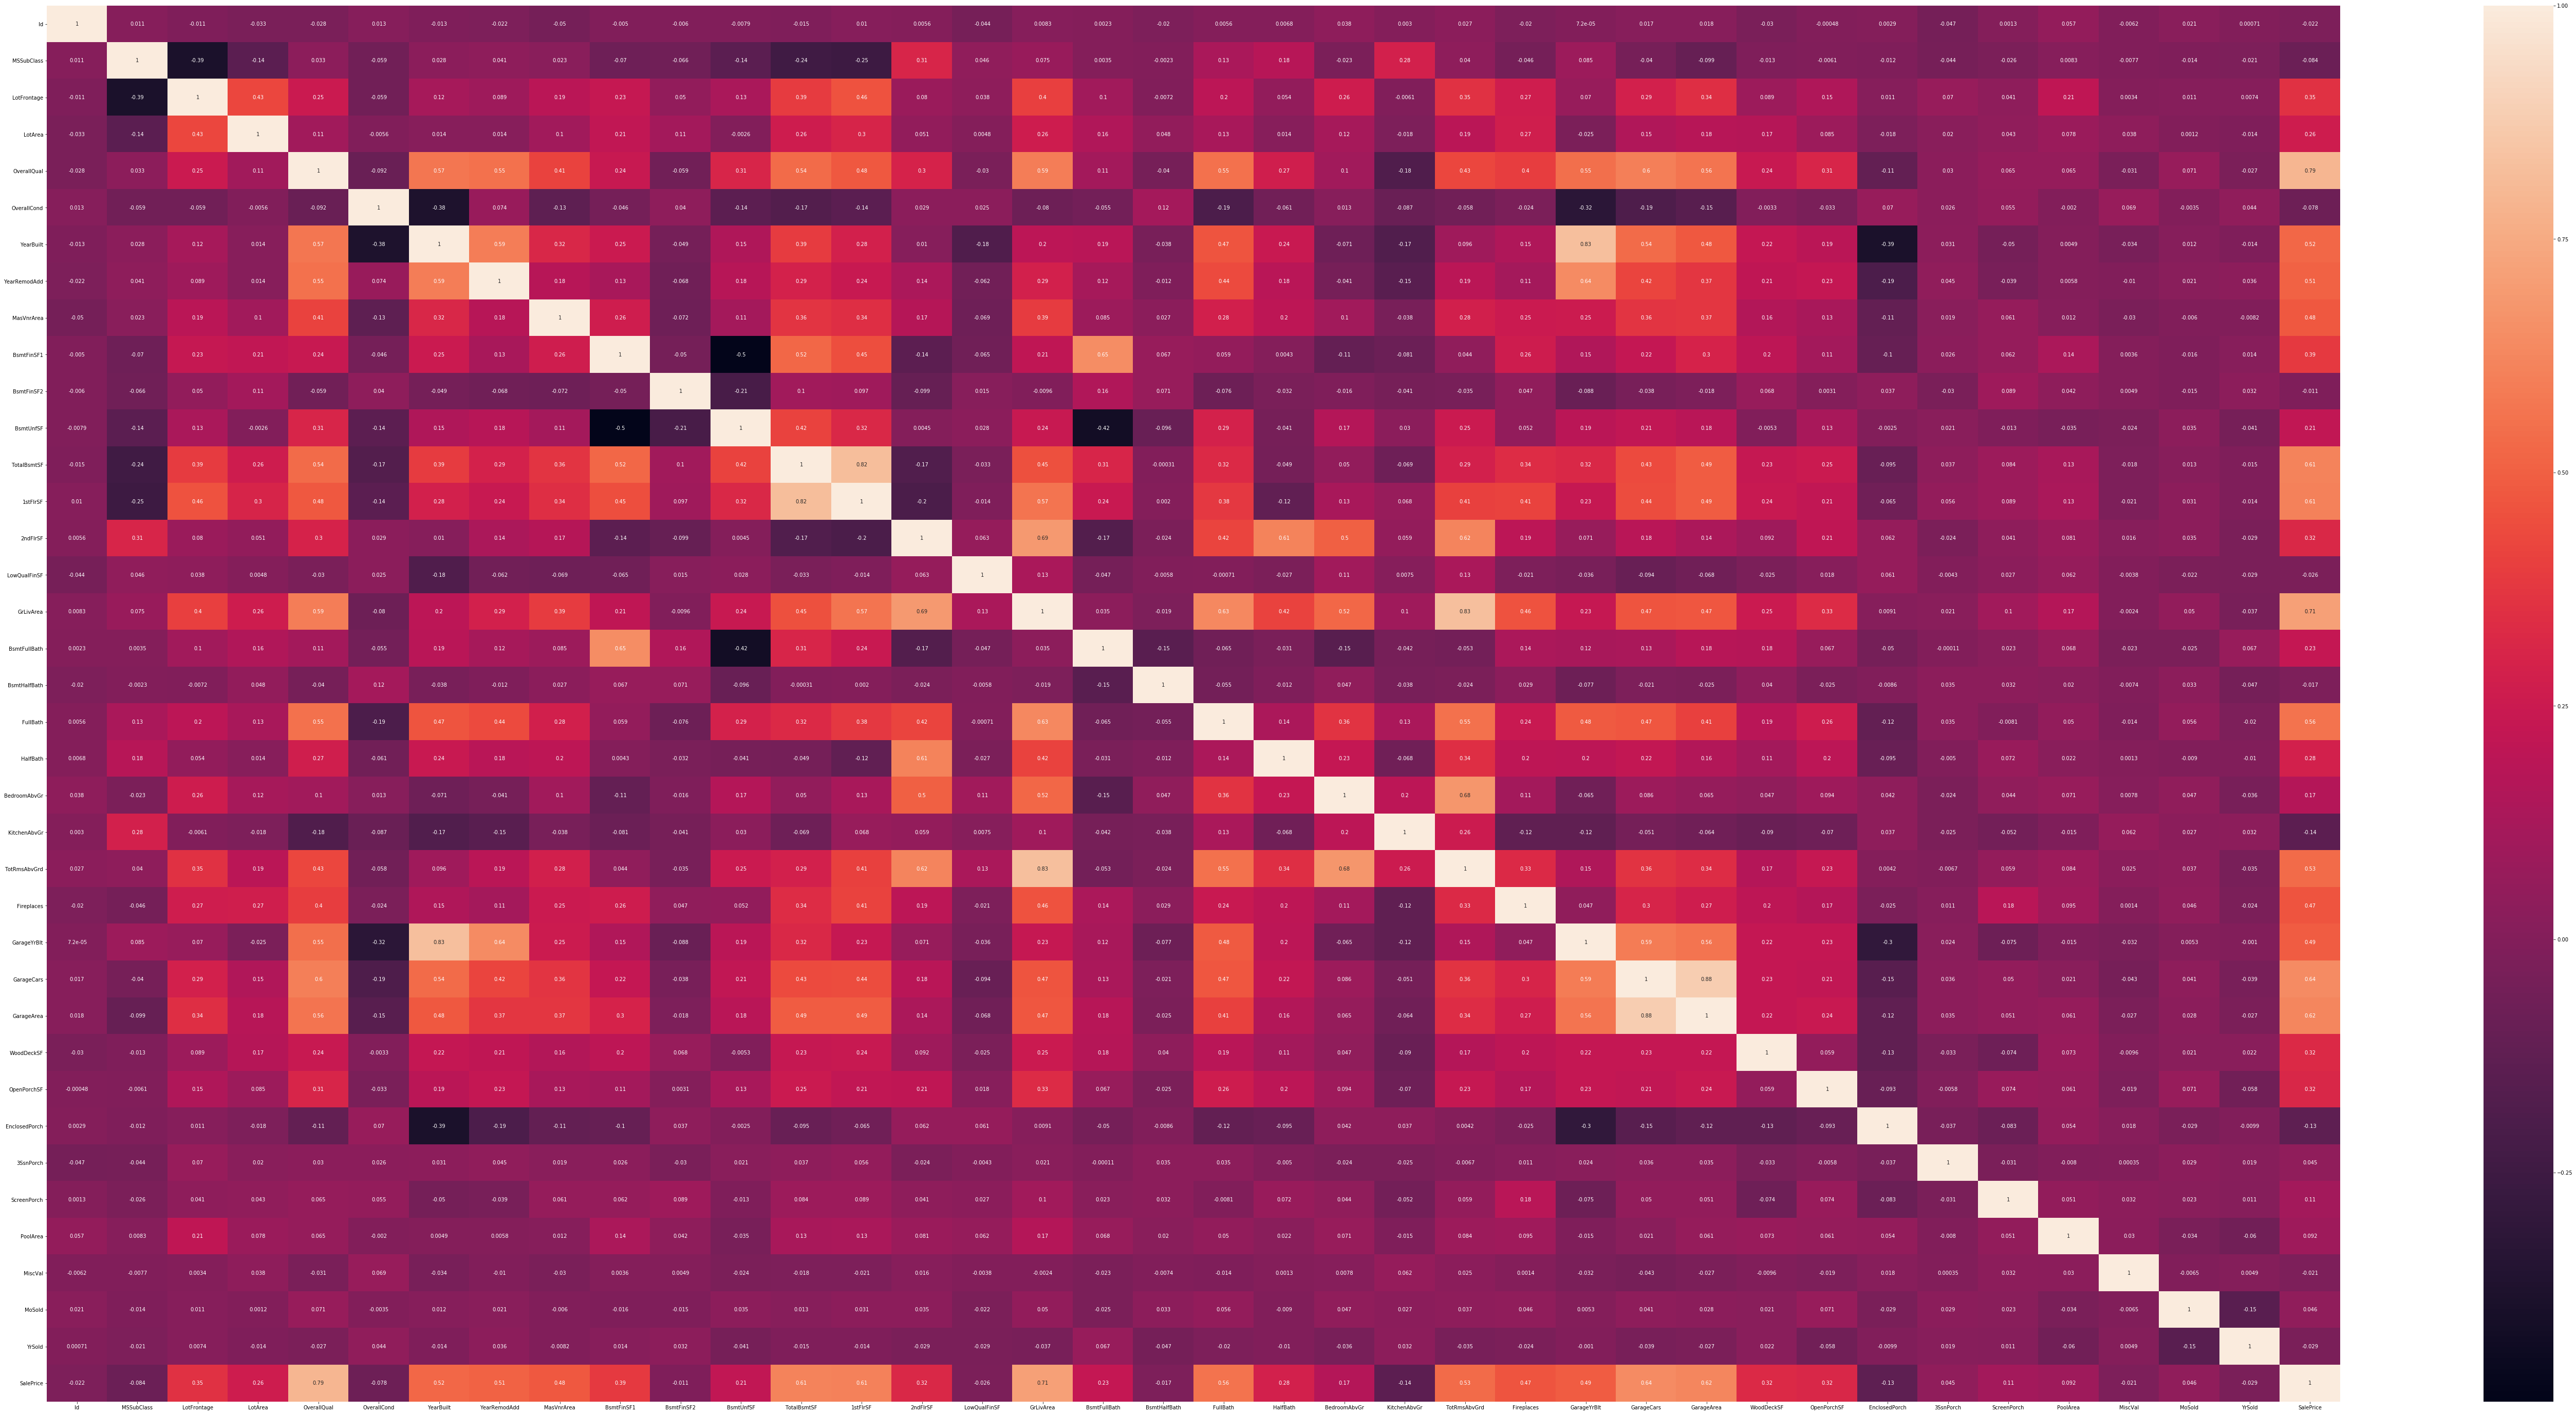

In [63]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,50))        

# Size of the figure
sns.heatmap(surprise.corr(),annot = True)
plt.show()

Since GarageYrBlt is highly correlated with the YearBuilt column (0.83) we can drop GarageYrBlt column, and we have another column containing number of Garages, so this column does not add any value.

In [64]:
surprise.drop(['GarageYrBlt'], axis=1, inplace=True)

We have few missing value in "LotFrontage" column, since its correlated with price, lets drop the rows with NaN Values
Also there is one missing value in 'Electrical' & few in 'MasVnrArea'. lets drop these too.

In [65]:
surprise = surprise[~np.isnan(surprise['LotFrontage'])]

In [66]:
surprise = surprise[~np.isnan(surprise['MasVnrArea'])]

In [67]:
surprise = surprise.dropna(subset=['Electrical'])

In [68]:
surprise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1459
Data columns (total 80 columns):
Id               1194 non-null int64
MSSubClass       1194 non-null int64
MSZoning         1194 non-null object
LotFrontage      1194 non-null float64
LotArea          1194 non-null int64
Street           1194 non-null object
Alley            1194 non-null object
LotShape         1194 non-null object
LandContour      1194 non-null object
Utilities        1194 non-null object
LotConfig        1194 non-null object
LandSlope        1194 non-null object
Neighborhood     1194 non-null object
Condition1       1194 non-null object
Condition2       1194 non-null object
BldgType         1194 non-null object
HouseStyle       1194 non-null object
OverallQual      1194 non-null int64
OverallCond      1194 non-null int64
YearBuilt        1194 non-null int64
YearRemodAdd     1194 non-null int64
RoofStyle        1194 non-null object
RoofMatl         1194 non-null object
Exterior1st      1194 non

In [69]:
print (surprise.isnull().values.any())

False


## Data Visualization

In [ ]:
# Pairplot for numerical variables
sns.pairplot(surprise)
plt.show()

## Data Preparation

### Dealing with Categorical Fields

#### Let's now prepare the data and build the model.


### Outliers Treatment

In [70]:
surprise.describe(percentiles = [.75,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,...,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,725.066164,57.215243,70.027638,9953.743719,6.115578,5.564489,1970.376884,1985.069514,102.789782,426.108878,...,89.547739,45.623116,22.864322,3.144054,15.116415,2.755444,25.639866,6.335008,2007.803183,180454.855109
std,421.102843,43.148952,24.299302,7944.707633,1.416597,1.096949,31.731221,21.199868,185.458287,463.935324,...,120.540943,65.792317,61.815791,28.858432,56.138262,38.978411,190.328558,2.699538,1.332660,83205.442060
min,1.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,719.500000,50.000000,69.000000,9248.500000,6.000000,5.000000,1972.000000,1995.000000,0.000000,351.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159000.000000
75%,1090.750000,70.000000,80.000000,11248.750000,7.000000,6.000000,2003.000000,2004.000000,160.000000,689.750000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213497.500000
99%,1448.070000,190.000000,141.210000,31971.600000,10.000000,9.000000,2009.000000,2009.000000,860.700000,1620.190000,...,474.840000,285.140000,259.350000,153.630000,271.350000,0.000000,625.600000,12.000000,2010.000000,446659.230000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,755000.000000


In [71]:
surprise = surprise.loc[surprise['LotArea'] <= np.percentile(surprise['LotArea'], 99, axis=0), :]

In [72]:
surprise.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,725.690355,57.254653,69.691201,9436.693739,6.099831,5.565144,1970.323181,1985.030457,100.201354,415.028765,...,87.334179,44.973773,23.096447,3.175973,14.721658,2.377327,25.900169,6.332487,2007.806261,179103.339255
std,421.434119,43.126307,23.109178,3729.924815,1.404064,1.096714,31.764301,21.221083,179.316135,431.100124,...,116.638187,64.522936,62.085851,29.002925,55.459862,36.629015,191.275429,2.691337,1.332405,81185.186153
min,1.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,363.250000,20.000000,59.000000,7400.750000,5.000000,5.000000,1950.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,127125.000000
50%,721.500000,50.000000,69.000000,9218.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,348.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157950.000000
75%,1090.750000,70.000000,80.000000,11197.000000,7.000000,6.000000,2003.000000,2004.000000,158.000000,685.500000,...,167.500000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212975.000000
max,1460.000000,190.000000,313.000000,31770.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,755000.000000


In [73]:
surprise.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [74]:
# split into X and y

X = surprise.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y = surprise['SalePrice']

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1182 non-null int64
MSZoning         1182 non-null object
LotFrontage      1182 non-null float64
LotArea          1182 non-null int64
Street           1182 non-null object
Alley            1182 non-null object
LotShape         1182 non-null object
LandContour      1182 non-null object
Utilities        1182 non-null object
LotConfig        1182 non-null object
LandSlope        1182 non-null object
Neighborhood     1182 non-null object
Condition1       1182 non-null object
Condition2       1182 non-null object
BldgType         1182 non-null object
HouseStyle       1182 non-null object
OverallQual      1182 non-null int64
OverallCond      1182 non-null int64
YearBuilt        1182 non-null int64
YearRemodAdd     1182 non-null int64
RoofStyle        1182 non-null object
RoofMatl         1182 non-null object
Exterior1st      1182 non-null object
Exterior2nd      1182 no

In [76]:
# creating dummy variables for categorical variables

# subset all categorical variables
surprise_categorical = X.select_dtypes(include=['object'])
surprise_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [77]:
# convert into dummies
surprise_dummies = pd.get_dummies(surprise_categorical, drop_first=True)
surprise_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
# drop categorical variables 
X = X.drop(list(surprise_categorical.columns), axis=1)

In [79]:
# concat dummy variables with X
X = pd.concat([X, surprise_dummies], axis=1)

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1459
Columns: 248 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(33), uint8(213)
memory usage: 578.3 KB


In [81]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

In [82]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##  Model Building and Evaluation

## Ridge and Lasso Regression

In [83]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013601,0.005239,0.0006,4.899014e-04,0.0001,{'alpha': 0.0001},-20832.775657,-20054.104901,-19433.506722,-20660.540903,...,-19932.032220,798.479666,28,-11669.640169,-12333.298620,-12540.762138,-11873.703989,-11949.355930,-12073.352169,317.572694
1,0.010201,0.001166,0.0006,4.899014e-04,0.001,{'alpha': 0.001},-20832.346555,-20054.003343,-19433.523846,-20660.476468,...,-19931.995812,798.240105,27,-11669.670713,-12333.287468,-12540.811878,-11873.739036,-11949.420738,-12073.385967,317.568277
2,0.011801,0.001833,0.0008,3.999949e-04,0.01,{'alpha': 0.01},-20828.057888,-20052.988150,-19433.673116,-20659.827955,...,-19931.610189,795.874516,26,-11669.972716,-12333.178994,-12541.304878,-11874.088891,-11950.062653,-12073.721626,317.524858
3,0.013801,0.001939,0.0010,1.168008e-07,0.05,{'alpha': 0.05},-20809.066193,-20048.487606,-19433.886654,-20656.857650,...,-19929.470038,785.963839,25,-11671.420654,-12332.758242,-12543.404197,-11875.723898,-11953.033629,-12075.268124,317.271017
4,0.011201,0.002040,0.0008,4.000425e-04,0.1,{'alpha': 0.1},-20785.541715,-20042.899289,-19433.252877,-20652.960325,...,-19925.993522,774.746395,24,-11673.265558,-12332.351115,-12545.965589,-11877.732442,-11958.120195,-12077.486980,316.851131


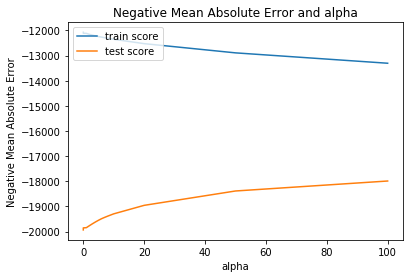

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
model_cv.best_params_

{'alpha': 100}

In [87]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
ridge.coef_ 

array([-2.76597887e+03,  1.36234768e+03,  4.99858712e+03,  9.38375599e+03,
        5.35140365e+03,  5.43818457e+03,  3.61035203e+03,  4.71006363e+03,
        6.98648247e+03,  1.26936697e+03,  3.80559956e+02,  8.08716531e+03,
        6.53494379e+03,  6.89131361e+03, -3.28647723e+02,  1.06262201e+04,
       -1.44741530e+01,  1.42301190e+02,  4.38990211e+03,  2.58269964e+03,
       -2.98966984e+03, -3.08858613e+03,  3.89941856e+03,  3.82557339e+03,
        3.29380787e+03,  3.42539596e+03,  1.01170485e+03,  2.62887859e+03,
        5.82043556e+02,  1.15626354e+03,  2.08789674e+03, -9.10288392e+01,
        7.95836015e+01, -9.56926398e+02,  2.87095243e+02,  2.63864055e+03,
        3.08217582e+02,  7.62401888e+02, -3.90262189e+02,  6.32760299e+02,
        8.64342884e+02, -1.63311157e+02,  7.86502830e+02,  5.13131058e+02,
       -3.80097190e+02,  1.02875825e+03, -1.64647369e+03,  2.12713030e+02,
        1.50172255e+03, -1.07526002e+03, -6.10834740e+02, -1.26267783e+02,
        3.61296718e+01,  

## Lasso

In [89]:
# lasso regression
lm = Lasso(alpha=10000)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8121850731929756
0.8323271401403909


In [90]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 178983.185),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 2699.634),
 ('OverallQual', 26315.18),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 3050.904),
 ('MasVnrArea', 2033.221),
 ('BsmtFinSF1', 6316.933),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 9510.753),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 20650.644),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 5203.657),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_NA', 0.0),
 ('Alley_Pave', -0.0

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   42.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.316218,0.054737,0.0008,4.000425e-04,0.0001,{'alpha': 0.0001},-21134.375185,-20096.121814,-19458.929240,-20692.627591,...,-20015.970113,869.557677,28,-11672.291024,-12329.521510,-12545.216405,-11874.098407,-11959.436188,-12076.112707,316.786818
1,0.352620,0.080246,0.0008,7.483537e-04,0.001,{'alpha': 0.001},-21134.258236,-20096.076609,-19458.913901,-20692.526838,...,-20015.904630,869.527862,27,-11672.291708,-12329.517180,-12545.217054,-11874.096506,-11959.437560,-12076.112002,316.786284
2,0.340820,0.034034,0.0032,4.915549e-03,0.01,{'alpha': 0.01},-21133.088665,-20095.624574,-19458.760505,-20691.526494,...,-20015.249856,869.232920,26,-11672.300170,-12329.473886,-12545.226782,-11874.078279,-11959.453948,-12076.106613,316.781200
3,0.335019,0.019174,0.0010,1.907349e-07,0.05,{'alpha': 0.05},-21127.876364,-20093.651473,-19458.079060,-20687.537291,...,-20012.485773,867.913628,25,-11672.373041,-12329.311039,-12545.303742,-11874.003576,-11959.563168,-12076.110913,316.760868
4,0.326819,0.034262,0.0010,0.000000e+00,0.1,{'alpha': 0.1},-21121.362589,-20091.201786,-19457.167667,-20683.102337,...,-20009.742163,865.428802,24,-11672.473016,-12329.157572,-12545.394967,-11873.911136,-11959.751440,-12076.137626,316.735839


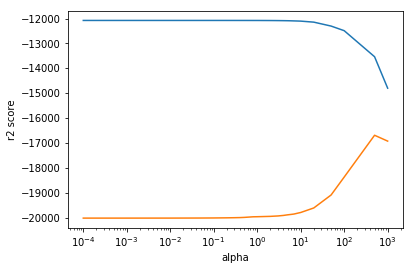

In [93]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

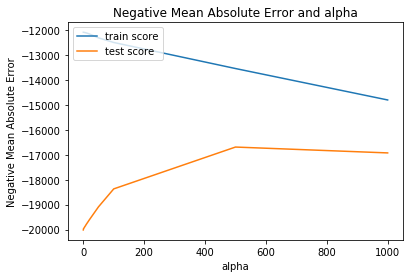

In [94]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [95]:
model_cv.best_params_

{'alpha': 500}

In [96]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
lasso.coef_

array([-4.81133574e+03,  0.00000000e+00,  5.40183184e+03,  1.01945848e+04,
        6.43688655e+03,  9.53114090e+03,  3.15186674e+03,  3.61748789e+03,
        7.20471718e+03,  3.76958218e+02, -0.00000000e+00,  7.59307981e+03,
        0.00000000e+00,  1.28510918e+03, -1.05213124e+03,  2.66982693e+04,
        0.00000000e+00, -0.00000000e+00,  1.99909931e+03,  1.19919040e+03,
       -3.35032698e+03, -2.34494452e+03,  1.34447353e+03,  1.85513645e+03,
        2.40070393e+03,  2.27444221e+03,  0.00000000e+00,  2.02722836e+03,
        0.00000000e+00,  1.08188753e+02,  1.05227271e+03, -0.00000000e+00,
       -0.00000000e+00, -4.44389060e+02,  0.00000000e+00,  2.32519552e+03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.99216974e+01, -0.00000000e+00,  3.94124483e+02,  0.00000000e+00,
       -0.00000000e+00,  3.86345800e+02, -1.01369730e+03,  0.00000000e+00,
        9.42276959e+02, -5.40209281e+02, -8.59386302e+01, -0.00000000e+00,
        0.00000000e+00, -

### The company wants to know:

Which variables are significant in predicting the price of a house?

How well those variables describe the price of a house?

#### For this we'll see the Positive coefficients

Example 
 ('LotArea', 2699.634),
 ('OverallQual', 26315.18),
 ('YearRemodAdd', 3050.904),
 ('MasVnrArea', 2033.221),
 ('BsmtFinSF1', 6316.933),
 ('TotalBsmtSF', 9510.753),
 ('GrLivArea', 20650.644),
 ('GarageArea', 5203.657),
 ('Neighborhood_NridgHt', 1737.387),
 ('SaleType_New', 1869.867),

In [98]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 178983.185),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 2699.634),
 ('OverallQual', 26315.18),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 3050.904),
 ('MasVnrArea', 2033.221),
 ('BsmtFinSF1', 6316.933),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 9510.753),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 20650.644),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 5203.657),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_NA', 0.0),
 ('Alley_Pave', -0.0

In [99]:
# lasso regression
lm = Lasso(alpha=500)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.934132651679589
0.9113229052908198


In [100]:
# Ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.935879289717884
0.9078956575431585
